# Lab 2. Convolutional Neural Networks (CNN) with Google Colab

## Import TensorFlow

In [1]:
# !pip install -q tensorboardcolab

# import tensorflow as tf
# print("TensorFlow:", tf.__version__)

TensorFlow: 2.10.0


## Check hardware

### CPU

In [ ]:
!cat /proc/cpuinfo

### RAM

In [ ]:
!cat /proc/meminfo

### GPU

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!nvidia-smi

## Mount Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Navigate to code directory
# %cd /content/drive/My Drive/Google Colab/cnn

# # List project directory contents
# !ls

## Application

### Import packages

In [1]:
from importlib import reload  # Allows reloading user libraries 

import cnn
from cnn import CNN
reload(cnn)

<module 'cnn' from 'c:\\Users\\juano\\Documents\\Master MBD\\Segundo_Cuatrimestre\\Machine Learning II\\Tema 6 Deeplearning\\Laboratorios\\RepoGihub\\BoW-CNN-DCGAN\\cnn\\cnn.py'>

### Global variables

In [2]:
training_dir = '../dataset/training'
validation_dir = '../dataset/validation'

cnn = CNN()

### Train



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 15)                15375     
                                                                 
Total params: 25,701,263
Trainable params: 2,113,551
Non-trainable params: 23,587,712
_________________________________________________________________


Training CNN...
Epoch 

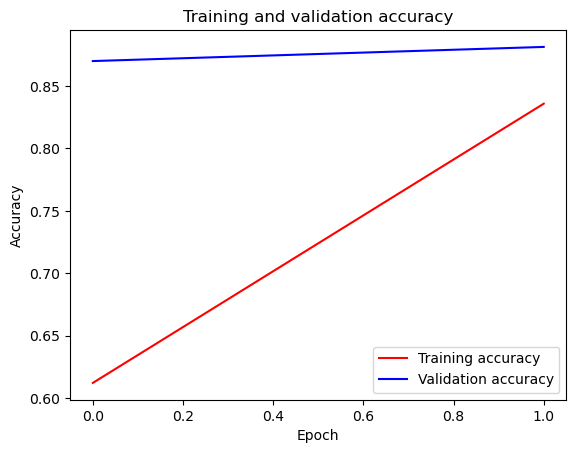

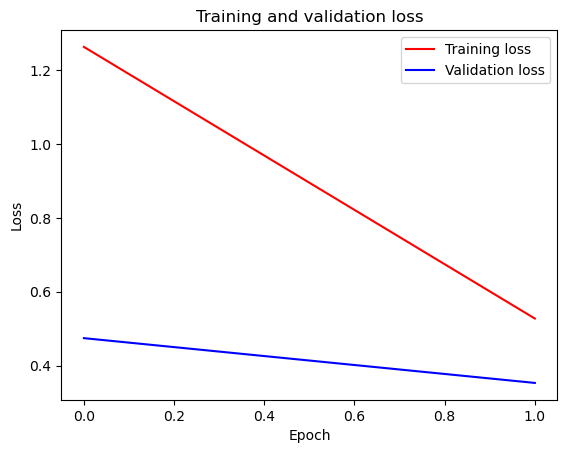

In [3]:
cnn.train(training_dir, validation_dir, base_model='ResNet50', epochs=2)
cnn.save('resnet50-2epoch')

### Predict

#### Load model

In [5]:
cnn.load('resnet50-2epoch')

#### Training set

In [6]:
cnn.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 467s 156ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            110.0    0.0     0.0      0.0         0.0          0.0      0.0          6.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  245.0     1.0      0.0         1.0          0.0      0.0          0.0       1.0     0.0          12.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   214.0      0.0         0.0          0.0      0.0          0.0       5.0     0.0           9.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    148.0         1.0          1.0      0.0          0.0       0.0     0.0           5.0    0.0     5.0     0.0      

#### Validation set

In [7]:
cnn.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 192s 128ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             93.0    0.0     0.0      0.0         0.0          1.0      0.0          4.0       0.0     0.0           0.0    1.0     0.0     0.0            1.0
Coast                0.0   93.0     0.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           7.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    91.0      0.0         0.0          0.0      0.0          0.0       3.0     0.0           6.0    0.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     90.0         0.0          0.0      0.0          0.0       0.0     0.0           4.0    0.0     5.0     0.0    